### Covid-19-India Dataset

> ***Here in this Dataset we have daily covid-19 reports. We are going to analyze this dataset with the help of Pandas Dataframe and other tools...***

In [1]:
### Importing required libraries...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Importing the dataset..
df=pd.read_csv('covid_19_india.csv')

### 1. Basic Analysis of the Data

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.shape

(18110, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=18110, step=1)

In [8]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [9]:
###Checking Null Values in the Dataset..
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

<AxesSubplot:>

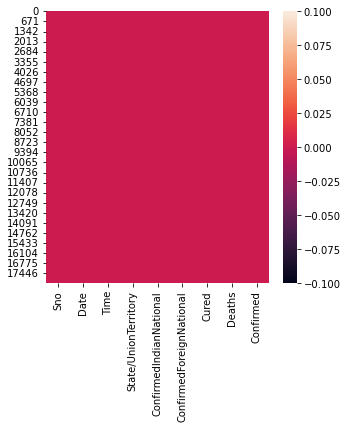

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
### We do not have any missing values in our data..

### 2. Feature Engineering and Data Cleaning

> Here we try to clean the messy data by manupulating our data set using different techniques..

In [11]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [12]:
df['Sno'].nunique()

18110

In [13]:
### We have Serial Number column which can work as the index but we will drop this column for our calculation..
df.drop(columns=['Sno'],axis=1,inplace=True)

In [14]:
df.head(1)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1


In [15]:
type(df['Date'][0])
### Date column is object type need to convert it into datetime object so that date-time function can be applied..

str

In [16]:
df['Date']=pd.to_datetime(df['Date'])

In [17]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
df['Date'][33].year

2020

In [19]:
df['Date'][33].month

3

In [20]:
df['Date'][33].month_name()

'March'

In [21]:
df['Date'][33].day

2

In [22]:
df['Date'][33].day_name()

'Monday'

In [23]:
df['Date'][33].week

10

In [24]:
df['Date'][33].weekday()

0

In [25]:
df['Date'][24].weekday()

6

In [26]:
df['State/UnionTerritory']### Let's change the name of this column for convenience..

0               Kerala
1               Kerala
2               Kerala
3               Kerala
4               Kerala
             ...      
18105        Telangana
18106          Tripura
18107      Uttarakhand
18108    Uttar Pradesh
18109      West Bengal
Name: State/UnionTerritory, Length: 18110, dtype: object

In [27]:
df.rename(columns={'State/UnionTerritory':'ST/UT'},inplace=True)

In [28]:
df.head(1)

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1


In [29]:
df['ST/UT'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [30]:
### We will not consider those state/UT categories where the total number of observations is less than 10 for our calculation..
df['ST/UT'].value_counts()[df['ST/UT'].value_counts()>100]

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Uttar Pradesh                               526
Haryana                                     526
Ladakh                                      523
Tamil Nadu                                  523
Punjab                                      521
Jammu and Kashmir                           521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [31]:
df['ST/UT'].value_counts()[df['ST/UT'].value_counts()>100].index

Index(['Kerala', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh',
       'Tamil Nadu', 'Punjab', 'Jammu and Kashmir', 'Maharashtra', 'Karnataka',
       'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim',
       'Telengana', 'Lakshadweep', 'Telangana'],
      dtype='object')

In [32]:
statesanduts=['Kerala', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh',
       'Tamil Nadu', 'Punjab', 'Jammu and Kashmir', 'Maharashtra', 'Karnataka',
       'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim',
       'Telengana', 'Lakshadweep', 'Telangana']

In [33]:
len(statesanduts)

37

In [34]:
ndf=df[df['ST/UT'].isin(statesanduts)]

In [35]:
ndf.head()

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


### 3. Exploratory Data Analysis(EDA) 
> This is an approach to analyze the data visually through different types of plots and graphs..

<AxesSubplot:xlabel='ST/UT'>

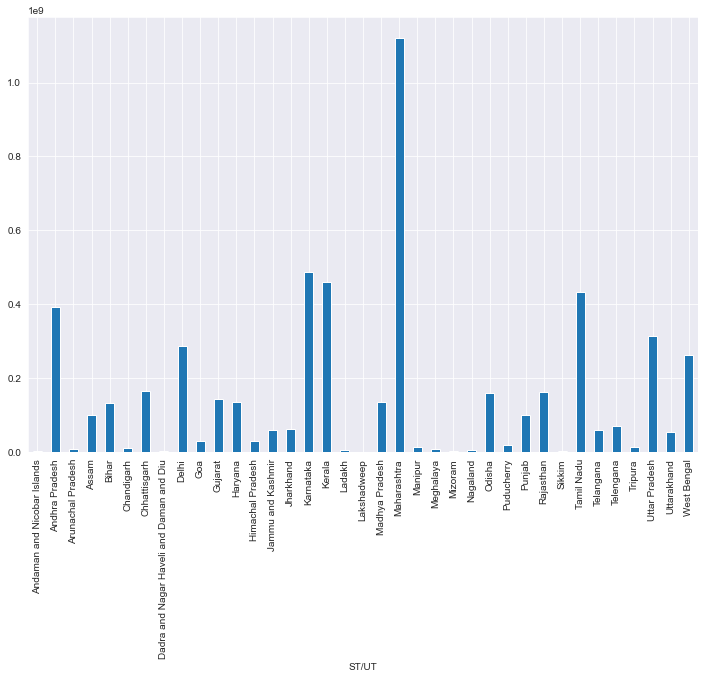

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ndf.groupby(by='ST/UT').sum()['Confirmed'].plot(kind='bar')

<AxesSubplot:xlabel='ST/UT'>

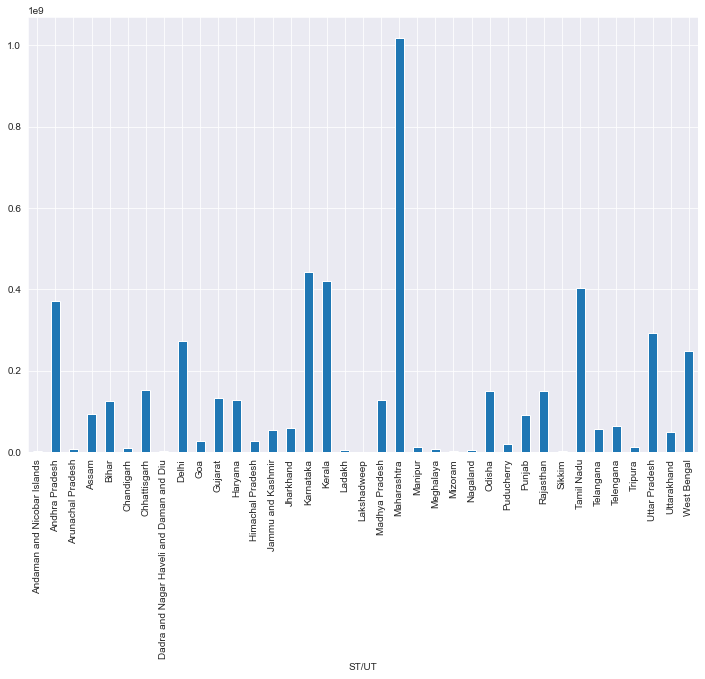

In [37]:
plt.figure(figsize=(12,8))
ndf.groupby(by='ST/UT').sum()['Cured'].plot(kind='bar')

<AxesSubplot:xlabel='ST/UT'>

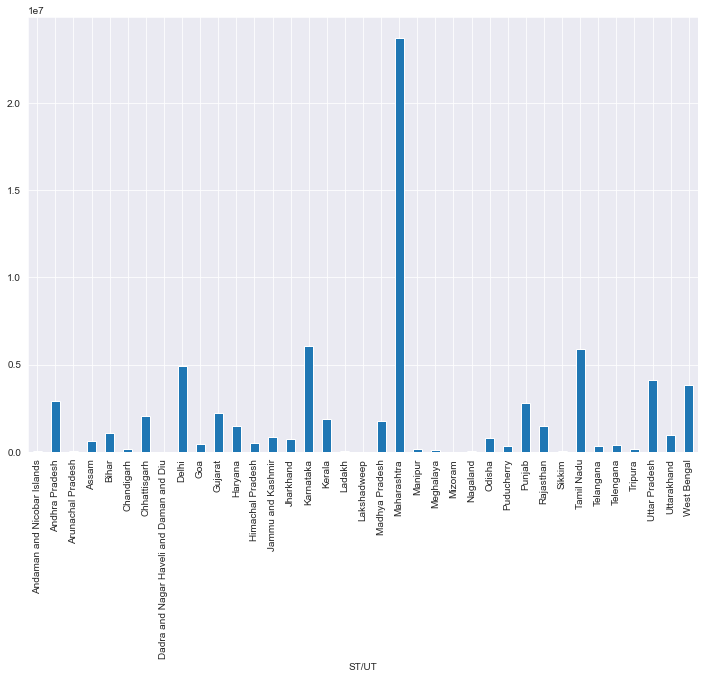

In [38]:
plt.figure(figsize=(12,8))
ndf.groupby(by='ST/UT').sum()['Deaths'].plot(kind='bar')

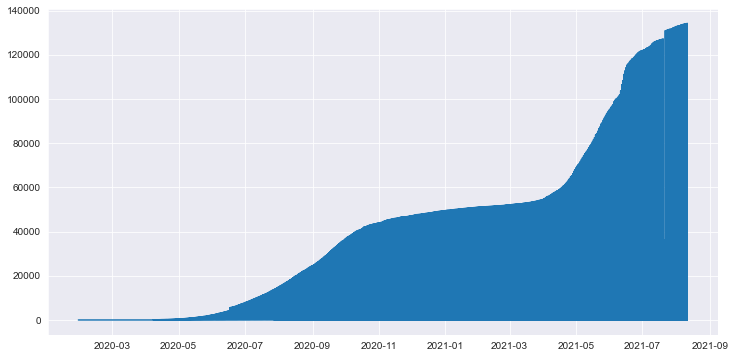

In [39]:
plt.figure(figsize=(12,6))
plt.plot(ndf['Date'],ndf['Deaths'])

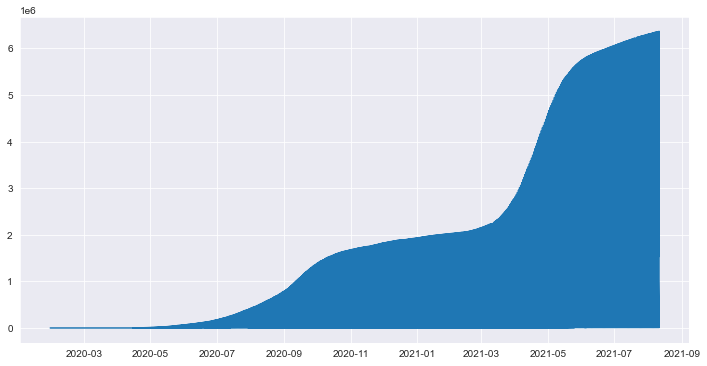

In [40]:
plt.figure(figsize=(12,6))
plt.plot(ndf['Date'],ndf['Confirmed'])

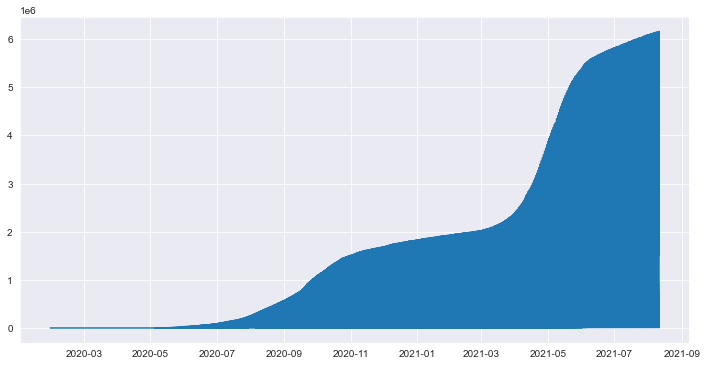

In [41]:
plt.figure(figsize=(12,6))
plt.plot(ndf['Date'],ndf['Cured'])

In [42]:
ndf.groupby(by='ST/UT')[['Confirmed','Deaths','Cured']].sum().sort_values(by='Confirmed',ascending=False)[:10]

,Confirmed,Deaths,Cured
ST/UT,,,
Maharashtra,1121491467,23737432,1018765039
Karnataka,485970693,6053762,441844360
Kerala,458906023,1888177,420174235
Tamil Nadu,431928644,5916658,404095807
Andhra Pradesh,392432753,2939367,370426530
Uttar Pradesh,312625843,4143450,291479351
Delhi,287227765,4943294,273419887
West Bengal,263107876,3846989,247515102
Chhattisgarh,163776262,2063920,151609364


In [43]:
ndf.groupby('ST/UT').sum()['Confirmed'].sort_values(ascending=False)[:1]

ST/UT
Maharashtra    1121491467
Name: Confirmed, dtype: int64

In [44]:
ndf.groupby('ST/UT').sum()['Confirmed'].sort_values(ascending=False)[-1:]

ST/UT
Lakshadweep    915784
Name: Confirmed, dtype: int64

In [45]:
ndf.groupby('ST/UT').sum()['Cured'].sort_values(ascending=False)[:1]

ST/UT
Maharashtra    1018765039
Name: Cured, dtype: int64

In [46]:
ndf.groupby('ST/UT').sum()['Cured'].sort_values(ascending=False)[-1:]

ST/UT
Lakshadweep    820925
Name: Cured, dtype: int64

In [47]:
ndf.groupby('ST/UT').sum()['Deaths'].sort_values(ascending=False)[:1]

ST/UT
Maharashtra    23737432
Name: Deaths, dtype: int64

In [48]:
ndf.groupby('ST/UT').sum()['Deaths'].sort_values(ascending=False)[-1:]

ST/UT
Dadra and Nagar Haveli and Daman and Diu    1014
Name: Deaths, dtype: int64

In [49]:
ndf[ndf['Deaths']==ndf['Deaths'].max()]

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442


In [50]:
wb_data=ndf[ndf['ST/UT']=='West Bengal']

In [51]:
wb_data[wb_data['Deaths']==wb_data['Deaths'].max()]

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18109,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


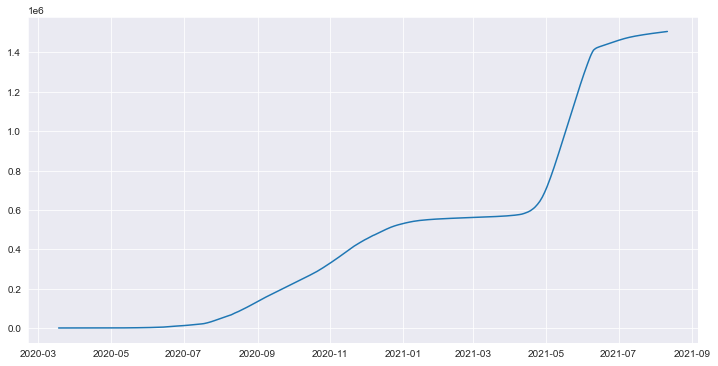

In [52]:
plt.figure(figsize=(12,6))
plt.plot(wb_data['Date'],wb_data['Cured'])

### Conclusion and Observations :

 1. We do not have any missing values in our dataset.
 2. We had Serial Number column which could work as the index but we have dropped this column for our calculation..
 3. Date column was object type and we converted it into datetime object so that date-time function can be applied..
 4. We have changed the state name column to ST/UT for our convenience.
 5. We have not considered those state/UT categories where the total number of observations is less than 10 for our calculation..
 6. In terms of highes number of confirmed cases, deaths and cured cases Maharastra stands at the top.
 7. We have observed that as the day have passed the total number of cases has increases drastically. From November 2020 to March 2021 there was no alarming spike in the total number of cases but after March 2021 the number of cases have increased dramatically.
 8. In Lakshadweep the total number of confirmed cases is least.
 9. In Dadra and Nagar Haveli and Daman and Diu the total number of Deaths is least. 


***1. Let's Remove all the records where Confirmed cases is less than 10..***

In [53]:
ndf[~(ndf['Confirmed']<10)]

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
44,2020-03-04,6:00 PM,Rajasthan,1,14,0,0,15
48,2020-03-05,6:00 PM,Rajasthan,1,14,0,0,15
54,2020-03-06,6:00 PM,Rajasthan,1,14,0,0,15
64,2020-03-07,6:00 PM,Rajasthan,1,14,0,0,15
68,2020-03-08,6:00 PM,Rajasthan,1,14,0,0,15
...,...,...,...,...,...,...,...,...
18105,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


***2. In which Region maximum number of Confirmed cases were recorded?***

In [54]:
ndf.groupby(by='ST/UT').sum()['Confirmed'].sort_values(ascending=False)[:1]

ST/UT
Maharashtra    1121491467
Name: Confirmed, dtype: int64

***3. In which Region minimum number of Death cases were recorded?***

In [55]:
ndf.groupby(by='ST/UT').sum()['Deaths'].sort_values(ascending=True)[:1]

ST/UT
Dadra and Nagar Haveli and Daman and Diu    1014
Name: Deaths, dtype: int64

***4. How many Confirmed ,Deaths and Recovered cases were reported between 23rd April 2021 to 7th March 2021?***

In [56]:
pdf=ndf.copy()

In [57]:
pdf.set_index(pdf['Date'],inplace=True)

In [58]:
pdf.head(2)

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2020-01-31,6:00 PM,Kerala,1,0,0,0,1


In [59]:
pdf.drop(columns=['Date'],axis=1,inplace=True)

In [60]:
pdf.head(2)

,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,
2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,6:00 PM,Kerala,1,0,0,0,1


In [61]:
pdf.loc['2020-04-23':'2021-03-07'][['Confirmed','Deaths','Cured']]

,Confirmed,Deaths,Cured
Date,,,
2020-04-23,18,0,11
2020-04-23,895,27,141
2020-04-23,1,0,1
2020-04-23,35,1,19
2020-04-23,148,2,46
...,...,...,...
2021-03-07,299900,1641,296373
2021-03-07,33424,391,33003
2021-03-07,97363,1694,95073


***5. Sort the entire data wrt No. of Confirmed cases in ascending order.***

In [62]:
ndf.sort_values(by='Confirmed',ascending=True)

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
10711,2021-01-18,8:00 AM,Lakshadweep,-,-,0,0,0
10099,2021-01-01,8:00 AM,Lakshadweep,-,-,0,0,0
9883,2020-12-26,8:00 AM,Lakshadweep,-,-,0,0,0
981,2020-04-15,5:00 PM,Nagaland,-,-,0,0,0
9739,2020-12-22,8:00 AM,Lakshadweep,-,-,0,0,0
...,...,...,...,...,...,...,...,...
17950,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759
17986,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
18022,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328
18058,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833


***6. Sort the entire data wrt No. of Recovered cases in descending order.***

In [63]:
ndf.sort_values(by='Cured',ascending=False)

,Date,Time,ST/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18094,2021-08-11,8:00 AM,Maharashtra,-,-,6159676,134201,6363442
18058,2021-08-10,8:00 AM,Maharashtra,-,-,6151956,134064,6357833
18022,2021-08-09,8:00 AM,Maharashtra,-,-,6144388,133996,6353328
17986,2021-08-08,8:00 AM,Maharashtra,-,-,6139493,133845,6347820
17950,2021-08-07,8:00 AM,Maharashtra,-,-,6130137,133717,6341759
...,...,...,...,...,...,...,...,...
9343,2020-12-11,8:00 AM,Lakshadweep,-,-,0,0,0
547,2020-04-01,7:30 PM,Manipur,-,-,0,0,1
545,2020-04-01,7:30 PM,Madhya Pradesh,-,-,0,3,66
541,2020-04-01,7:30 PM,Jharkhand,-,-,0,0,1
